## Artificial Neural Network


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1 - Data Preprocessing

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!


what is keras ?
Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks in machine learning. TensorFlow provides both high-level and low-level APIs while Keras provides only high-level API


Keras is a high-level interface and uses Theano or Tensorflow for its backend.


keras is tightly integrated into the TensorFlow ecosystem,

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Schematically, the following Sequential model: # Define Sequential model with 3 layers model = keras.

In [ ]:
# Adding the input layer and the first hidden layer
#classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, batch_size = 10,  epochs= 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3406 - accuracy: 0.8621
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3400 - accuracy: 0.8630
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8621
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3391 - accuracy: 0.8625
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3391 - accuracy: 0.8621
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8625
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3388 - accuracy: 0.8612
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3379 - accuracy: 0.8630
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3381 - accuracy: 0.8624
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3383 - accura

In [ ]:
X_train.shape

(8000, 11)

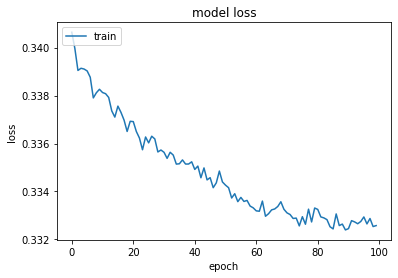

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1507   88]
 [ 189  216]]


In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [ ]:
score

0.8615